**Import dependencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


**CLean data & Preprocessing**

In [ ]:

orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')


print(orders.head())

print(orders.info())

print(orders.describe())

print(products.head())

print(products.info())

print(products.describe())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [ ]:
orders = orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
products = products.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm',  "product_height_cm", 'product_width_cm'  ])
products.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [ ]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
products_items = pd.merge(products, order_items, on='product_id')
display(products_items.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [ ]:
orders_products_items = pd.merge(orders, products_items, on='order_id')
display(orders_products_items)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas,...,4.0,500.0,19.0,8.0,13.0,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,perfumaria,...,1.0,400.0,19.0,13.0,19.0,1,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,automotivo,...,1.0,420.0,24.0,19.0,21.0,1,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,...,3.0,450.0,30.0,10.0,20.0,1,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,...,4.0,250.0,51.0,15.0,15.0,1,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108638,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,f1d4ce8c6dd66c47bbaa8c6781c2a923,bebes,...,4.0,4950.0,40.0,10.0,40.0,1,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
108639,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,b80910977a37536adeddd63663f916ad,eletrodomesticos_2,...,2.0,13300.0,32.0,90.0,22.0,1,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
108640,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,...,1.0,6550.0,20.0,20.0,20.0,1,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
108641,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,...,1.0,6550.0,20.0,20.0,20.0,2,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [ ]:
orders_products_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108643 entries, 0 to 108642
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       108643 non-null  object 
 1   customer_id                    108643 non-null  object 
 2   order_status                   108643 non-null  object 
 3   order_purchase_timestamp       108643 non-null  object 
 4   order_approved_at              108643 non-null  object 
 5   order_delivered_carrier_date   108643 non-null  object 
 6   order_delivered_customer_date  108643 non-null  object 
 7   order_estimated_delivery_date  108643 non-null  object 
 8   product_id                     108643 non-null  object 
 9   product_category_name          108643 non-null  object 
 10  product_name_lenght            108643 non-null  float64
 11  product_description_lenght     108643 non-null  float64
 12  product_photos_qty            

**EDA**

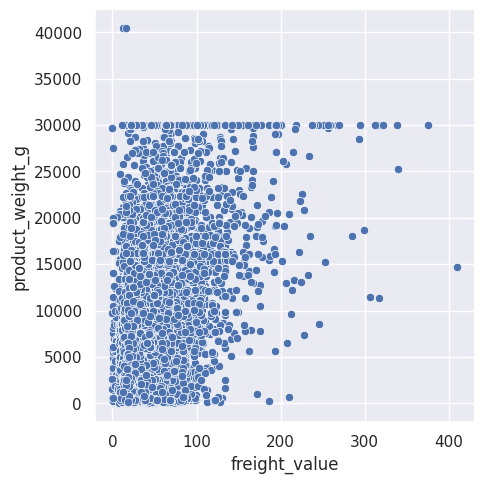

In [ ]:
sns.relplot(
    data=orders_products_items, x="freight_value", y="product_weight_g",
    sizes=(15, 200)
)

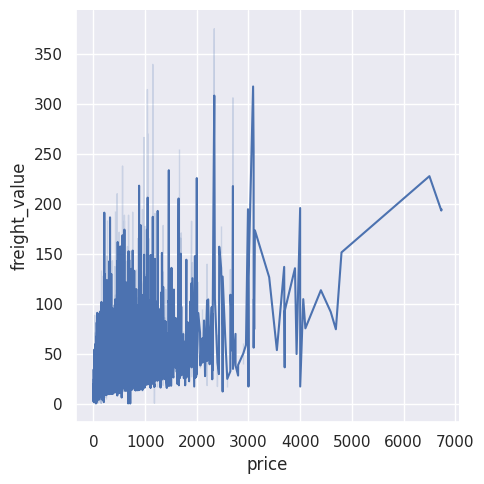

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(data=orders_products_items, x="price", y="freight_value", kind="line")

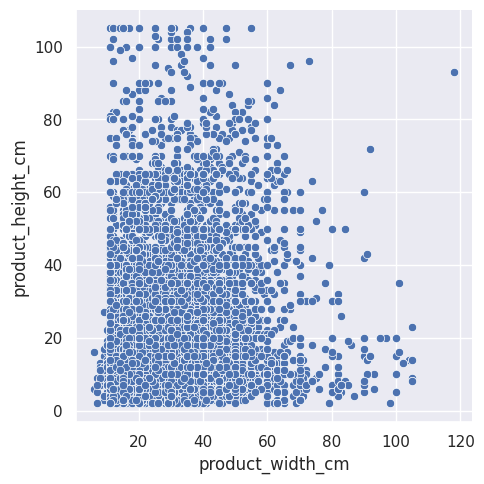

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(data=orders_products_items, x="product_width_cm", y="product_height_cm", kind="scatter")

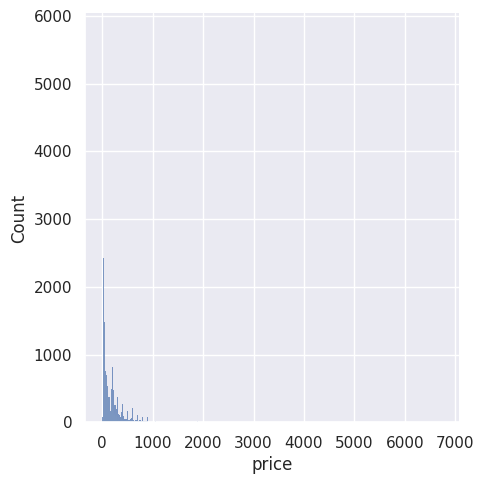

In [ ]:
sns.displot(data=orders_products_items, x="price")

**Feature engineering**

***Duration:***
The number of days it took to deliver products

In [ ]:
orders_products_items['delivery_duration_days'] = (
    pd.to_datetime(orders_products_items['order_delivered_customer_date']) -
    pd.to_datetime(orders_products_items['order_purchase_timestamp'])
).dt.days


***Carrier Handling Time:*** Time taken by the carrier to deliver the order after receiving it.

In [ ]:
orders_products_items['carrier_handling_days'] = (
    pd.to_datetime(orders_products_items['order_delivered_customer_date']) -
    pd.to_datetime(orders_products_items['order_delivered_carrier_date'])
).dt.days


***Deliver delay time:*** Difference between actual and estimated delivery dates.

In [ ]:
orders_products_items['delivery_delay_days'] = (
    pd.to_datetime(orders_products_items['order_delivered_customer_date']) -
    pd.to_datetime(orders_products_items['order_estimated_delivery_date'])
).dt.days


***Total order value:*** value of of the product in total

In [ ]:
orders_products_items['total_order_value'] = (
    orders_products_items['price'] + orders_products_items['freight_value']
)


Volumn of product

In [ ]:
orders_products_items['product_volume_cm3'] = (
    orders_products_items['product_length_cm'] *
    orders_products_items['product_height_cm'] *
    orders_products_items['product_width_cm']
)


Product Length category

In [ ]:
orders_products_items['product_name_length_category'] = pd.cut(
    orders_products_items['product_name_lenght'],
    bins=[0, 20, 40, 60, 100],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)


In [ ]:
orders_products_items = orders_products_items.drop(columns=['order_id', 'customer_id', 'order_approved_at',
                           'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                           'product_id', 'seller_id', 'shipping_limit_date'])

In [ ]:
orders_products_items.head()

,order_status,order_purchase_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value,delivery_duration_days,carrier_handling_days,delivery_delay_days,total_order_value,product_volume_cm3,product_name_length_category
0,delivered,2017-10-02 10:56:33,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,29.99,8.72,8,6,-8,38.71,1976.0,Medium
1,delivered,2018-07-24 20:41:37,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1,118.70,22.76,13,12,-6,141.46,4693.0,Medium
2,delivered,2018-08-08 08:38:49,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1,159.90,19.22,9,9,-18,179.12,9576.0,Long
3,delivered,2017-11-18 19:28:06,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,1,45.00,27.20,13,9,-13,72.20,6000.0,Long
4,delivered,2018-02-13 21:18:39,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,1,19.90,8.72,2,1,-10,28.62,11475.0,Medium


In [ ]:
orders_products_items['order_purchase_timestamp'] = pd.to_datetime(orders_products_items['order_purchase_timestamp'])
orders_products_items['order_purchase_date'] = orders_products_items['order_purchase_timestamp'].dt.date
orders_products_items['order_purchase_time'] = orders_products_items['order_purchase_timestamp'].dt.time


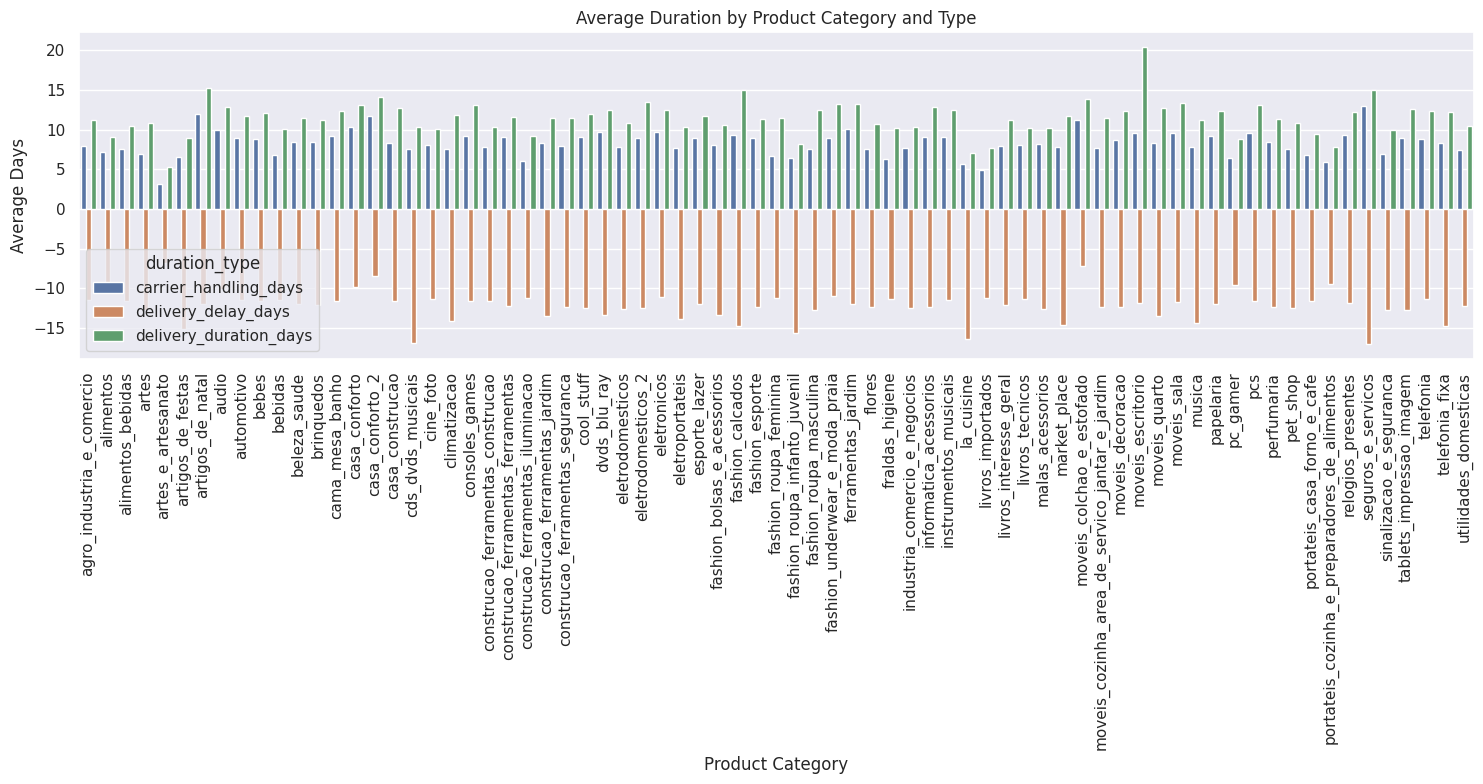

In [ ]:
import matplotlib.pyplot as plt

# Melt the dataframe to have duration types as a single column
duration_df = orders_products_items[['product_category_name', 'delivery_duration_days', 'carrier_handling_days', 'delivery_delay_days']].melt(
    id_vars='product_category_name',
    var_name='duration_type',
    value_name='days'
)

# Calculate average days for each duration type and product category
average_duration = duration_df.groupby(['product_category_name', 'duration_type'])['days'].mean().reset_index()

# Plot the clustered bar chart
plt.figure(figsize=(15, 8))
sns.barplot(data=average_duration, x='product_category_name', y='days', hue='duration_type')
plt.xticks(rotation=90)
plt.title('Average Duration by Product Category and Type')
plt.ylabel('Average Days')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

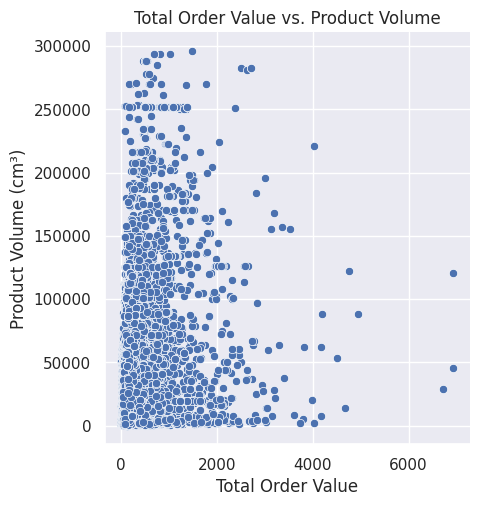

In [ ]:
sns.relplot(data=orders_products_items, x="total_order_value", y="product_volume_cm3", kind="scatter")
plt.title('Total Order Value vs. Product Volume')
plt.xlabel('Total Order Value')
plt.ylabel('Product Volume (cm³)')
plt.show()

# Product Categories Explanation

This document explains the product categories found in the Brazilian e-commerce dataset.

## Categories

- **cama_mesa_banho**  
  Items for the bedroom, table, and bath—such as sheets, towels, bedding, and tablecloths.

- **beleza_saude**  
  Beauty and health products, including cosmetics, skincare, haircare, supplements, and personal care items.

- **esporte_lazer**  
  Sports and leisure products, like exercise equipment, outdoor gear, and recreational items.

- **moveis_decoracao**  
  Furniture and decoration—sofas, chairs, tables, lamps, and home decor accessories.

- **informatica_acessorios**  
  Computer accessories, such as keyboards, mice, monitors, cables, and other tech peripherals.

- **eletrodomesticos**  
  Home appliances, including refrigerators, microwaves, washing machines, and small kitchen appliances.

- **alimentos_bebidas**  
  Food and beverages—packaged foods, snacks, drinks, and groceries.

- **livros_tecnicos**  
  Technical books, covering subjects like engineering, science, programming, and professional development.

- **fashion_roupa_feminina**  
  Women’s clothing—dresses, tops, pants, skirts, and other apparel for women.



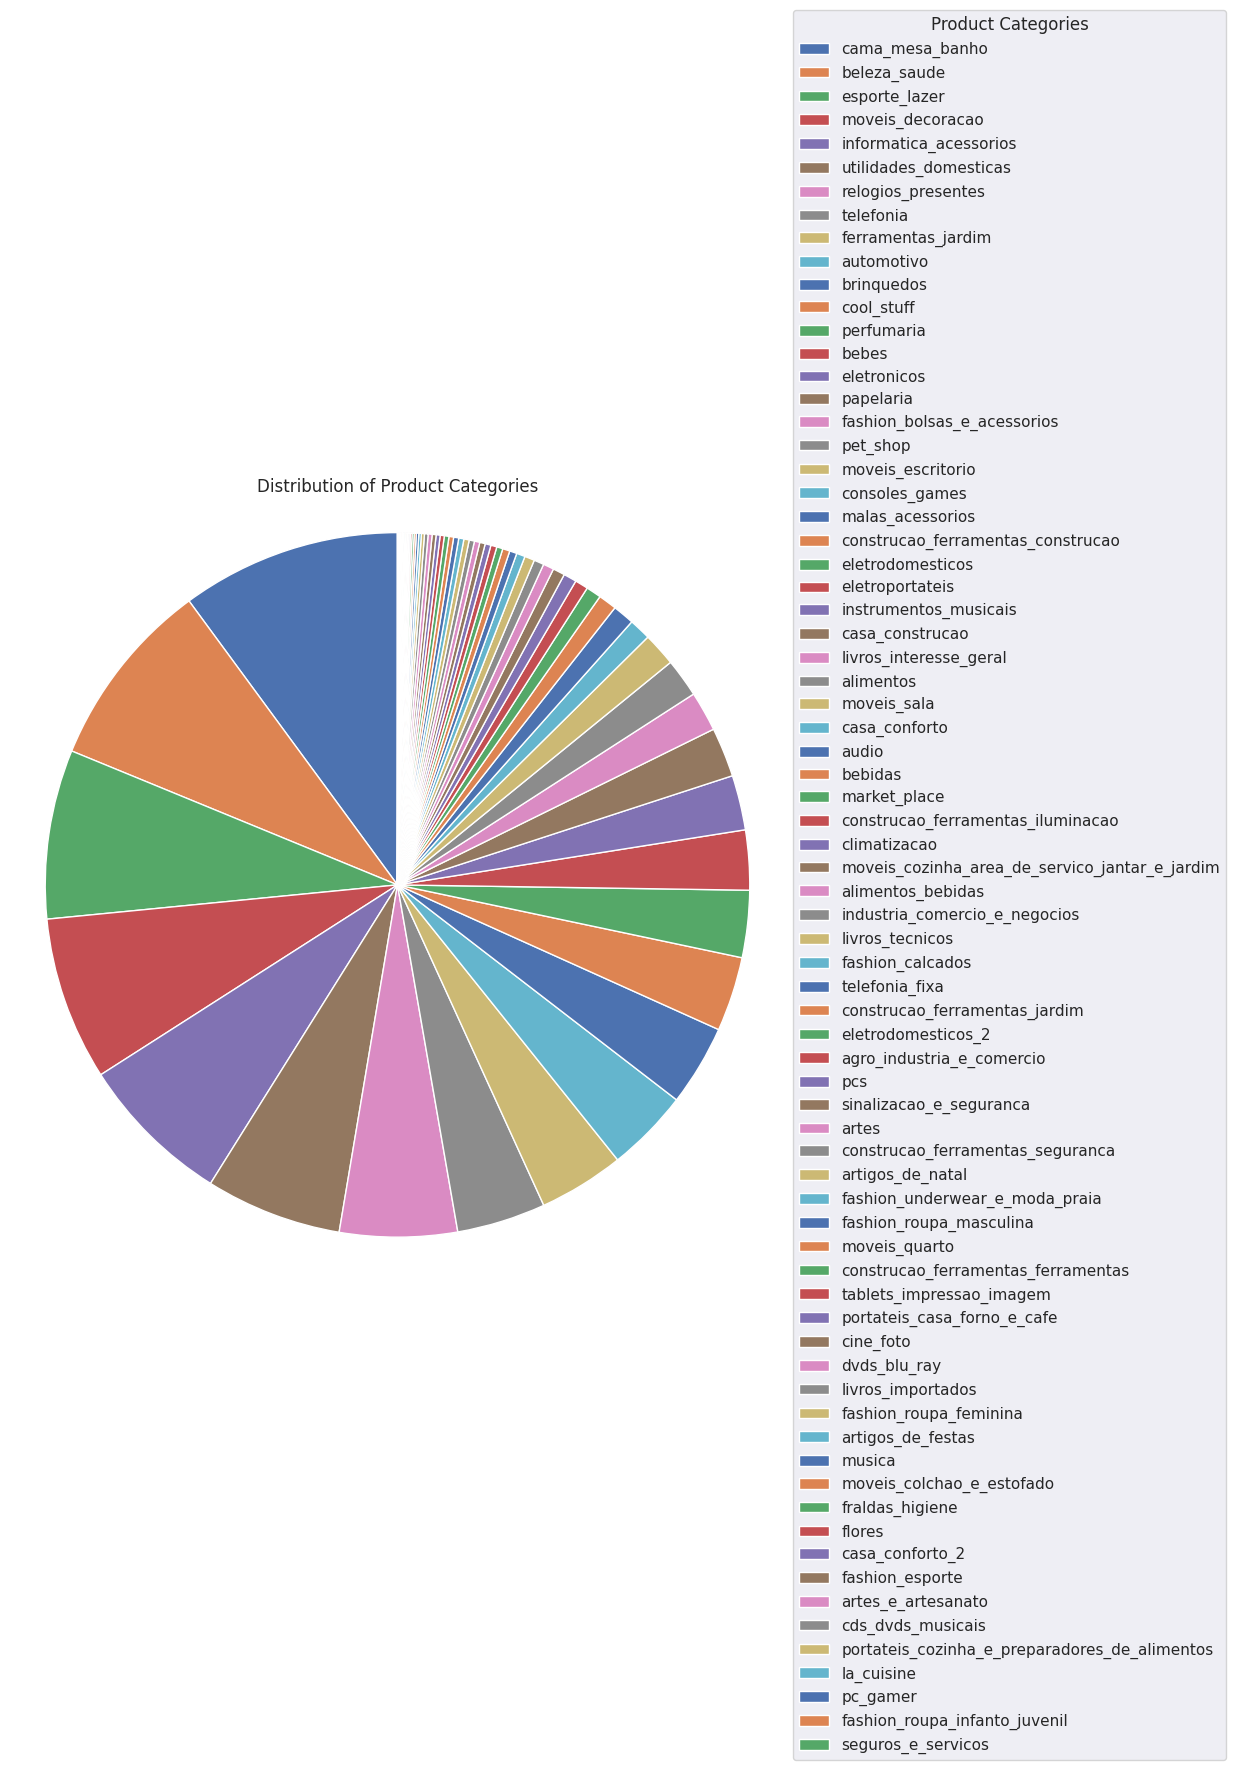

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each product category
product_category_counts = orders_products_items['product_category_name'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(product_category_counts, labels=product_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Product Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Insights on Delivery Performance by Product Category

This section summarizes key findings from the analysis of delivery durations and delays across product categories.

## 1. Product Category Impacts Delivery Performance
Some categories consistently have longer carrier handling times, delivery durations, or delays such as
+ aticos de natal (chirstmas decoration)
+ móveis escritório (furniture designed for office or workspace)
+ fashion calcados (Styled shoes and footwear).

It indicate these products take longer to reach customers.

## 2. Carrier Handling and Delivery Delays Are Not Uniform
- The difference in blue (carrier handling days) and orange (delivery delay days) bars across categories suggests that logistics efficiency and punctuality vary by product type.
- Categories with negative delivery delay days (orange bars below zero) may be delivered earlier than estimated.

## 3. Potential Bottlenecks or Efficiency
- Categories with high carrier handling days might face bottlenecks in shipping or require special handling.
- Categories with low or negative delivery delay days may have more reliable or faster delivery processes.

## 4. Areas for Improvement
- Product categories with consistently high delivery delays or durations could be targeted for process improvements.
- Understanding which categories are most affected can help optimize logistics and customer satisfaction.

# Distribution of Product Categories

The "Distribution of Product Categories" pie chart reveals which product categories dominate the marketplace and where strategic focus could yield the greatest results. According to the chart, the categories with the largest segments—and therefore the highest sales volume or product count—are:

- **cama_mesa_banho** (bed, table, and bath items): Includes sheets, towels, bedding, and tablecloths.
- **beleza_saude** (beauty and health): Encompasses skincare, cosmetics, haircare, supplements, and personal care products.
- **esporte_lazer** (sports and leisure): Covers exercise equipment, outdoor gear, and recreational items.
- **moveis_decoracao** (furniture and decoration): Consists of sofas, chairs, tables, lamps, and home decor accessories.
- **informatica_acessorios** (computer accessories): Includes keyboards, mice, monitors, cables, and other tech peripherals.
- **utilidades_domesticas** (household utilities): Features kitchen tools, cleaning supplies, storage solutions, and everyday household items.
- **eletrônicos** (electronics): Comprises smartphones, tablets, computers, televisions, and audio equipment.

Focusing on these high-volume categories can help maximize sales and market share, as they represent the core interests of the customer base. Additionally, monitoring trends in these categories allows for timely inventory adjustments and targeted marketing campaigns. For further growth, consider exploring opportunities in smaller yet emerging segments such as **brinquedos** (toys), **perfumaria** (perfumery), and **bebe** (baby products), which may offer potential for expansion with the right promotional strategies.

By prioritizing these specific product categories, the marketplace can better align its resources with consumer demand and drive sustained business growth.